In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from api_keys import api_key


In [6]:
api_key = api_key 

url = "https://mashvisor-api.p.rapidapi.com/trends/cities"

querystring = {"state":"TX","page":"1","items":"20"}

headers = {
	"content-type": "application/octet-stream",
	"X-RapidAPI-Key": api_key,
	"X-RapidAPI-Host": "mashvisor-api.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring).json()


In [7]:
city_data = pd.json_normalize(response["content"]["cities"])
city_data = city_data.sort_values(["occupancy"],ascending=False)
city_data["occupancy"]=city_data["occupancy"]
city_data = city_data.reset_index(drop= True)
city_data
city_data_cleaned=city_data.rename(columns={'city':"City","state":"State", "occupancy":"Occupancy %","total_listing":"Total Airbnb Listing"})
city_data_cleaned

,City,State,Occupancy %,Total Airbnb Listing,occ_listing
0,Denton,TX,61,451,27511
1,Abilene,TX,53,743,39379
2,Waco,TX,52,2752,143104
3,Fort Worth,TX,51,14972,763572
4,Round Rock,TX,51,614,31314
5,Irving,TX,49,918,44982
6,Austin,TX,47,16884,793548
7,San Marcos,TX,47,1356,63732
8,College Station,TX,43,589,25327
9,South Padre Island,TX,43,902,38786


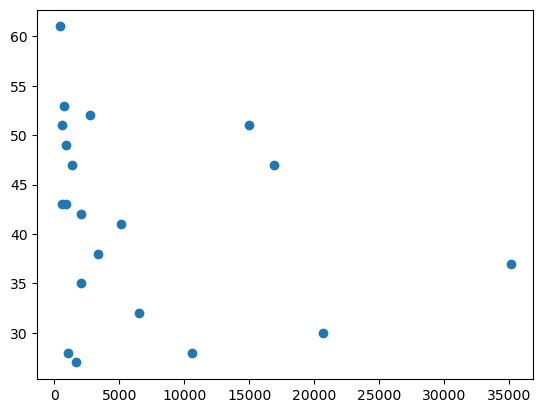

In [46]:
plt.scatter(city_data_cleaned["Total Airbnb Listing"],city_data_cleaned["Occupancy %"])
#sayed run a regression and correlatio nfor this to see if it makes sense to do so.

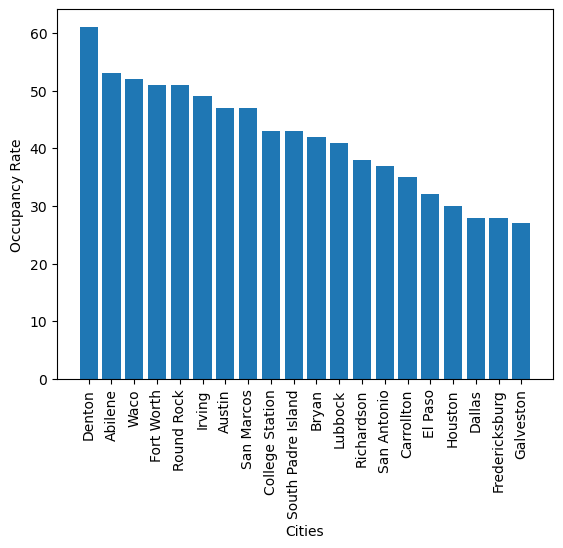

In [39]:
#what city has the highest occupancy rate? show chart 
x_values=city_data_cleaned["City"]
plt.bar(city_data_cleaned["City"],city_data_cleaned["Occupancy %"],alpha = 1, align="center")
plt.xticks(rotation = 90)
plt.xlabel("Cities")
plt.ylabel("Occupancy Rate")
plt.show()

In [ ]:
#sayed
# create a map plot to show city & total listings---show market share

In [8]:

url = "https://mashvisor-api.p.rapidapi.com/airbnb-property/occupancy-rates"
studio = []
one_bed = []
two_bed = []
three_bed = []
four_bed =[]



state = "TX"
for x in range(20):
    try:
        city = city_data_cleaned["City"][x]
        
        querystring = {"state": state ,"city": city}
        headers = {
            "content-type": "application/octet-stream",
            "X-RapidAPI-Key": api_key,
            "X-RapidAPI-Host": "mashvisor-api.p.rapidapi.com"
            }
        response_1 = requests.get(url, headers=headers, params=querystring).json()
        studio.append(response_1["content"]["occupancy_rates"]["studio"])
        one_bed.append(response_1["content"]["occupancy_rates"]["one_bedroom"])
        two_bed.append(response_1["content"]["occupancy_rates"]["two_bedrooms"])
        three_bed.append(response_1["content"]["occupancy_rates"]["three_bedrooms"])
        four_bed.append(response_1["content"]["occupancy_rates"]["four_bedrooms"])

    except:
        pass

In [9]:
rooms_data = pd.DataFrame({"City":city_data_cleaned["City"],"Studio Occupancy Rate":studio, "One Bedroom Occupancy Rate":one_bed,"Two Bedroom Occupancy Rate":two_bed,"Three Bedroom Occupancy Rate":three_bed, "Four Bedroom Occupancy Rate":four_bed})
rooms_data

,City,Studio Occupancy Rate,One Bedroom Occupancy Rate,Two Bedroom Occupancy Rate,Three Bedroom Occupancy Rate,Four Bedroom Occupancy Rate
0,Denton,81,60,58,50,60
1,Abilene,69,52,50,46,54
2,Waco,51,50,50,49,60
3,Fort Worth,60,52,50,49,52
4,Round Rock,42,61,56,49,48
5,Irving,62,52,41,47,49
6,Austin,50,51,45,44,43
7,San Marcos,41,47,45,43,45
8,College Station,55,48,44,43,37
9,South Padre Island,43,43,53,41,34


In [37]:
#average for each room type
studio_avg = rooms_data["Studio Occupancy Rate"].mean()
one_bed_avg = rooms_data["One Bedroom Occupancy Rate"].mean()
two_bed_avg = rooms_data["Two Bedroom Occupancy Rate"].mean()
three_bed_avg = rooms_data["Three Bedroom Occupancy Rate"].mean()
four_bed_avg = rooms_data["Four Bedroom Occupancy Rate"].mean()

room_avg =pd.DataFrame({"Studio Avg": studio_avg, "One Bed Avg": one_bed_avg, "Two Bed Avg":two_bed_avg,"Three Bed Avg": three_bed_avg,"Four Bed Avg":four_bed_avg},index=[0])
room_avg

,Studio Avg,One Bed Avg,Two Bed Avg,Three Bed Avg,Four Bed Avg
0,47.4,44.55,42.6,40.45,42.95


In [28]:
#correclation between occ rate and price #maura 
studio_rate = []
onebed_rate=[]
twobed_rate =[]
threebed_rate = []
fourbed_rate = []

url = "https://mashvisor-api.p.rapidapi.com/rental-rates"
for x in range(20):
    try:
        
        city = city_data_cleaned["City"][x]
        querystring = {"state":"TX","source":"airbnb","city": city}
    
        headers = {
             "content-type": "application/octet-stream",
             "X-RapidAPI-Key": api_key,
             "X-RapidAPI-Host": "mashvisor-api.p.rapidapi.com"}

        response_3= requests.get(url, headers=headers, params=querystring).json()
        studio_rate.append(response_3["content"]["retnal_rates"]["studio_value"])
        onebed_rate.append(response_3["content"]["retnal_rates"]["one_room_value"])
        twobed_rate.append(response_3["content"]["retnal_rates"]["two_room_value"])
        threebed_rate.append(response_3["content"]["retnal_rates"]["three_room_value"])
        fourbed_rate.append(response_3["content"]["retnal_rates"]["four_room_value"])
    except:
         pass



In [29]:
avg_rate=pd.DataFrame({"City":city_data_cleaned["City"],"Studio Avg Rental Rate":studio_rate,"One Bed Avg Rental Rate": onebed_rate,"Two Bed Avg Rental Rate":twobed_rate,"Three Bed Avg Rental Rate":threebed_rate,"Four Bed Avg Rental Rate":fourbed_rate})
avg_rate

,City,Studio Avg Rental Rate,One Bed Avg Rental Rate,Two Bed Avg Rental Rate,Three Bed Avg Rental Rate,Four Bed Avg Rental Rate
0,Denton,2154,1405,2367,2759,4035
1,Abilene,1478,1233,1825,2215,3598
2,Waco,1503,1798,2264,3136,4523
3,Fort Worth,1604,1517,2195,2896,3575
4,Round Rock,1248,1952,2806,2725,3130
5,Irving,1423,1405,1520,2367,3439
6,Austin,1682,1788,2293,3346,4669
7,San Marcos,1543,1570,2233,2575,4653
8,College Station,2207,1561,1820,2998,3675
9,South Padre Island,1512,1823,2538,4031,5164


In [36]:
studio_rate_avg = avg_rate["Studio Avg Rental Rate"].mean()
onebed_rate_avg = avg_rate["One Bed Avg Rental Rate"].mean()
twobed_rate_avg = avg_rate["Two Bed Avg Rental Rate"].mean()
threebed_rate_avg = avg_rate["Three Bed Avg Rental Rate"].mean()
fourbed_rate_avg = avg_rate["Four Bed Avg Rental Rate"].mean()

total_avgs = pd.DataFrame({"Studio Total Avg Rate":studio_rate_avg,"One Bed Total Avg Rate":onebed_rate_avg,"Two Bed Total Avg Rate":twobed_rate_avg,"Three Bed Total Avg Rate": threebed_rate_avg,"Four Bed Total Avg Rate":fourbed_rate_avg},index=[0])
total_avgs

,Studio Total Avg Rate,One Bed Total Avg Rate,Two Bed Total Avg Rate,Three Bed Total Avg Rate,Four Bed Total Avg Rate
0,1350.85,1362.75,1808.85,2505.85,3507.9


In [30]:
room_city_data = pd.merge(city_data_cleaned,avg_rate,how="left", on = ["City"])
room_city_data

,City,State,Occupancy %,Total Airbnb Listing,occ_listing,Studio Avg Rental Rate,One Bed Avg Rental Rate,Two Bed Avg Rental Rate,Three Bed Avg Rental Rate,Four Bed Avg Rental Rate
0,Denton,TX,61,451,27511,2154,1405,2367,2759,4035
1,Abilene,TX,53,743,39379,1478,1233,1825,2215,3598
2,Waco,TX,52,2752,143104,1503,1798,2264,3136,4523
3,Fort Worth,TX,51,14972,763572,1604,1517,2195,2896,3575
4,Round Rock,TX,51,614,31314,1248,1952,2806,2725,3130
5,Irving,TX,49,918,44982,1423,1405,1520,2367,3439
6,Austin,TX,47,16884,793548,1682,1788,2293,3346,4669
7,San Marcos,TX,47,1356,63732,1543,1570,2233,2575,4653
8,College Station,TX,43,589,25327,2207,1561,1820,2998,3675
9,South Padre Island,TX,43,902,38786,1512,1823,2538,4031,5164


In [ ]:
#occupancy vs. rental per city per 4 bed---Sayed 

In [ ]:
# pull from real estate api for cities, the property tax info, home sales, size (sq ft vs bedrooms), sales dates #Doaa 


In [ ]:
#map to show amount of properties sold in each city. ---will show indicator of how fast city is growing and population

In [ ]:
#show  homes sold cost vs month and correlation - what month is best to buy a home? 

In [ ]:
# price vs location, price vs month. 